In [60]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
!apt-get install python3.10

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.5-1+bionic1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [64]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras
print('Done')

Done


In [69]:
os.listdir('/content/drive/MyDrive/Colab Notebooks')

['Untitled0.ipynb']

In [70]:
dataset = pd.read_excel('/content/train_interview.xlsx')
dataset.head()

,Comments Text
0,Which people might believe Hong Kong is pretty...
1,And it's very crowded even as compared to Hong...
2,And the main thing about Delhi is that it's pr...
3,But it was way different than the places I've ...
4,So I guess the pressure comes from that just w...


In [71]:
dataset.shape

(653, 1)

In [72]:
dataset.isnull().sum()

Comments Text    0
dtype: int64

In [73]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

for i in range(len(dataset)):
  dataset.at[i,'Comments Text'] = remove_urls(dataset.iloc[i]['Comments Text'])
dataset.head()

,Comments Text
0,Which people might believe Hong Kong is pretty...
1,And it's very crowded even as compared to Hong...
2,And the main thing about Delhi is that it's pr...
3,But it was way different than the places I've ...
4,So I guess the pressure comes from that just w...


In [74]:
# Convert to list
data = dataset['Comments Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['Which people might believe Hong Kong is pretty crowded but Delhi is more crowded']


In [75]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['which', 'people', 'might', 'believe', 'hong', 'kong', 'is', 'pretty', 'crowded', 'but', 'delhi', 'is', 'more', 'crowded']]


In [76]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['which', 'people', 'might', 'believe', 'hong_kong', 'is', 'pretty', 'crowded', 'but', 'delhi', 'is', 'more', 'crowded']


In [77]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

stop_words = set(stopwords.words("english"))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [78]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [80]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [81]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['people', 'believe', 'pretty', 'crowded', 'delhi', 'crowded']]


In [82]:
dataset = []
for i in range(len(data_lemmatized)):
    dataset.append(" ".join(data_lemmatized[i]))
dataset = pd.Series(dataset)

In [83]:
no_features = 15000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
tf = tf_vectorizer.fit_transform(dataset)
tf_feature_names = tf_vectorizer.get_feature_names()

In [84]:
no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [85]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 25
print('NMF')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA')
display_topics(lda, tf_feature_names, no_top_words)

NMF
Topic 0:
difficult, course, math, find, think, course difficult, difficult course, finance, find difficult, elec, lot, actually difficult, course actually difficult, course actually, actually, math course, take, course find, accounting, course take, course find difficult, elective, difficult course right, course right, think difficult
Topic 1:
look, job, look job, start look job, start look, start, look job really, job really, job really hard, year, hard, really hard, job yet year, job yet, yet year, look job yet, want job, graduation, think, guess back think, think start look, back think, back think start, guess back, really
LDA
Topic 0:
really, get, study, go, good, job, want, know, life, well, come, think, hard, find, pressure, work, difficult, lot, year, course
Topic 1:
lot, course, think, difficult, work, year, find, hard, pressure, get, well, come, really, know, go, job, study, want, good, life


In [86]:
# Create Document — Topic Matrix
lda_output = lda.transform(tf)
# column names
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset2 = pd.read_excel('/content/train_interview.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset2['label'] = df_document_topics['dominant_topic']

In [87]:
dataset2.head()

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0


In [88]:
# Create Document — Topic Matrix
nmf_output = nmf.transform(tfidf)
# column names
topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset1 = pd.read_excel('/content/train_interview.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset1['label'] = df_document_topics['dominant_topic']

In [89]:
dataset1.head()

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0


In [90]:
dataset1[dataset1['label']==1]

,Comments Text,label
31,So I really like embedded systems so that's wh...,1
36,I got two and half weeks and I still haven't s...,1
76,It's not very stable and not like the kind of ...,1
89,I haven't been able to get a job like a proper...,1
104,Because you won't find the usual tech jobs in ...,1
106,Everyone wants a job,1
107,After after graduation I would like I would li...,1
131,Job I am not so worried about because I have k...,1
164,And I don't know I guess I'll just keep applyi...,1
205,I am looking for a job,1


In [91]:
for i in range(20):
    print(dataset1[dataset1['label']==1].iloc[i][0])
    print('\n')

So I really like embedded systems so that's why I got that's why I ended up like working my job is like embedded systems related


I got two and half weeks and I still haven't started looking at so kind of screwed


It's not very stable and not like the kind of job that you can do after you have attend a high level of degrees


I haven't been able to get a job like a proper job


Because you won't find the usual tech jobs in Hong Kong


Everyone wants a job


After after graduation I would like I would like a job like who wouldn't


Job I am not so worried about because I have kind of like it is open ended but I still have some options so I am not worried about it


And I don't know I guess I'll just keep applying to jobs over there


I am looking for a job


So and about jobs in the future a lot of jobs that the CS student will take an ECE student can also take that job


I'd like to do an MBA at one point maybe two years after having a job


I'm not looking for a job right now becaus

In [92]:
dataset2[dataset2['label']==1]

,Comments Text,label
27,And then I ended up being a TA for that and I ...,1
28,Well back when I was a first year this is this...,1
29,So I started doing a bunch of other stuff so a...,1
39,I mean the last major piece of work we had to ...,1
41,And I think I did pretty poorly in the midterm...,1
...,...,...
644,Um I have exams in like two or three weeks tim...,1
646,I'm in my second year at the moment so it will...,1
647,um I particularly find uh the electronics cour...,1
651,Yeah my plan after graduation is to either wor...,1


In [93]:
for i in range(20):
    print(dataset2[dataset2['label']==1].iloc[i][0])
    print('\n')

And then I ended up being a TA for that and I have been doing that for three years


Well back when I was a first year this is this course called airship where they taught us how to build an app controller ship in the whole semester and that was a project


So I started doing a bunch of other stuff so a few hackathons design competitions and also I did this like first year engineering course


I mean the last major piece of work we had to hand in was the interactive systems presentation


And I think I did pretty poorly in the midterm as well


So I found it really hard to like catch up


I think the course I found most difficult would probably be interactive systems because it was just a lot of information in a very short time


And the courses I'm doing I did multimedia computing and also intro into interactive systems and also signal processing as well


I'm a fourth year undergraduate student in the electronic engineering department


So it's kind of balanced the pressure so


But 

In [94]:
dataset1.head(15)

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0
5,And it still hurts when you lose,0
6,But still I like competitions I mean I think y...,0
7,But then as soon as you realize that you can't...,0
8,And it it turned like you know at first it was...,0
9,I guess most of the pressure came from myself ...,0


In [95]:
for i in range(len(dataset2)):
  dataset1.at[i,'Comments Text'] = remove_urls(dataset1.iloc[i]['Comments Text'])
dataset1.head()

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0


In [96]:
# Convert to list
data = dataset1['Comments Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove distracting commas
data = [re.sub(",", "", sent) for sent in data]

# Remove distracting commas
data = [sent.lower() for sent in data]

# Remove distracting dots
data = [sent.replace('.', '') for sent in data]

print(data[:1])

['which people might believe hong kong is pretty crowded but delhi is more crowded']


In [97]:
tweets = np.array(data)
labels = np.array(dataset2['label'])

In [98]:
print(len(tweets),len(labels))

653 653


In [99]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
max_words = 20000
max_len = 400

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[  0   0   0 ...   9  69 337]
 [  0   0   0 ...   2  41  43]
 [  0   0   0 ...  19 126 727]
 ...
 [  0   0   0 ...  73 163  57]
 [  0   0   0 ... 165  16  11]
 [  0   0   0 ... 232   3 165]]


In [100]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

489 164 489 164


In [101]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40))
model1.add(layers.LSTM(40,dropout=0.5))
model1.add(layers.Dense(1,activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=7,validation_data=(X_test, y_test))

Epoch 1/7
16/16 [==============================] - 9s 361ms/step - loss: 0.6464 - accuracy: 0.6892 - val_loss: 0.6012 - val_accuracy: 0.7012
Epoch 2/7
16/16 [==============================] - 7s 424ms/step - loss: 0.6007 - accuracy: 0.6871 - val_loss: 0.5817 - val_accuracy: 0.7012
Epoch 3/7
16/16 [==============================] - 6s 396ms/step - loss: 0.5711 - accuracy: 0.6892 - val_loss: 0.5675 - val_accuracy: 0.7012
Epoch 4/7
16/16 [==============================] - 7s 427ms/step - loss: 0.5186 - accuracy: 0.7178 - val_loss: 0.5066 - val_accuracy: 0.7561
Epoch 5/7
16/16 [==============================] - 6s 402ms/step - loss: 0.4226 - accuracy: 0.8037 - val_loss: 0.4411 - val_accuracy: 0.7866
Epoch 6/7
16/16 [==============================] - 6s 401ms/step - loss: 0.3287 - accuracy: 0.8855 - val_loss: 0.4326 - val_accuracy: 0.7927
Epoch 7/7
16/16 [==============================] - 8s 486ms/step - loss: 0.2893 - accuracy: 0.9141 - val_loss: 0.4287 - val_accuracy: 0.7927


In [102]:
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

6/6 - 0s - loss: 0.4287 - accuracy: 0.7927 - 467ms/epoch - 78ms/step
Model accuracy:  0.792682945728302


In [103]:
y_pred = model1.predict(X_test)

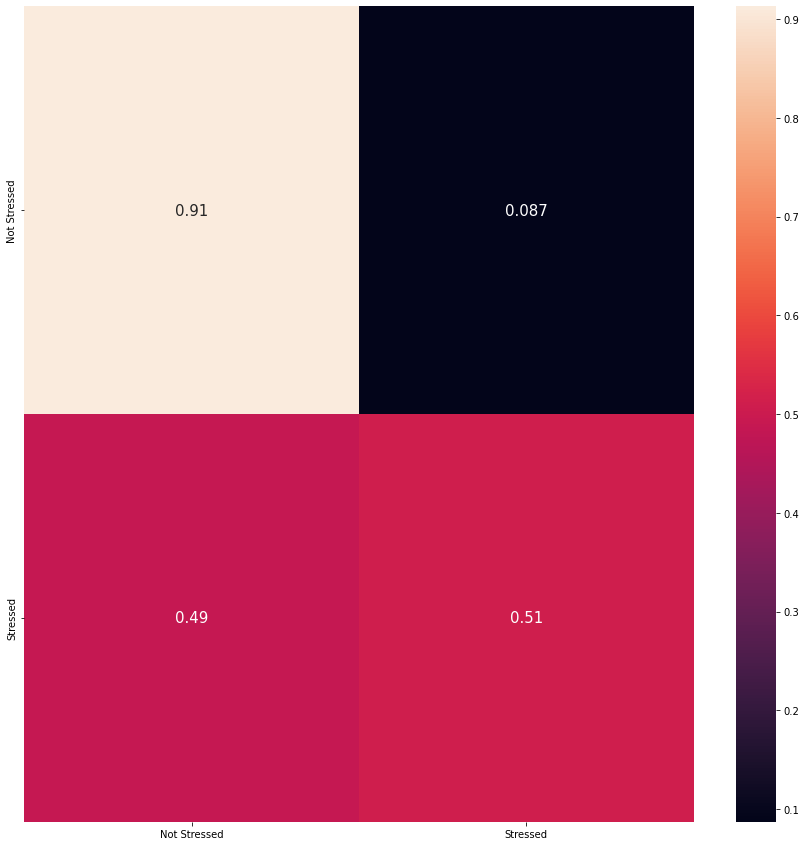

In [104]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Not Stressed','Stressed'],columns = ['Not Stressed','Stressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [105]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40))
model2.add(layers.LSTM(40,dropout=0.5,return_sequences=True))
model2.add(layers.LSTM(40,dropout=0.5))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
16/16 [==============================] - 14s 574ms/step - loss: 0.6450 - accuracy: 0.6687 - val_loss: 0.6092 - val_accuracy: 0.7012
Epoch 2/5
16/16 [==============================] - 7s 447ms/step - loss: 0.6004 - accuracy: 0.6871 - val_loss: 0.5822 - val_accuracy: 0.7012
Epoch 3/5
16/16 [==============================] - 7s 435ms/step - loss: 0.5586 - accuracy: 0.6953 - val_loss: 0.5535 - val_accuracy: 0.7500
Epoch 4/5
16/16 [==============================] - 7s 437ms/step - loss: 0.4430 - accuracy: 0.8200 - val_loss: 0.5508 - val_accuracy: 0.7744
Epoch 5/5
16/16 [==============================] - 7s 437ms/step - loss: 0.3286 - accuracy: 0.8896 - val_loss: 0.4748 - val_accuracy: 0.7622


In [106]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

6/6 - 0s - loss: 0.4748 - accuracy: 0.7622 - 412ms/epoch - 69ms/step
Model accuracy:  0.7621951103210449


In [107]:
y_pred = model2.predict(X_test)

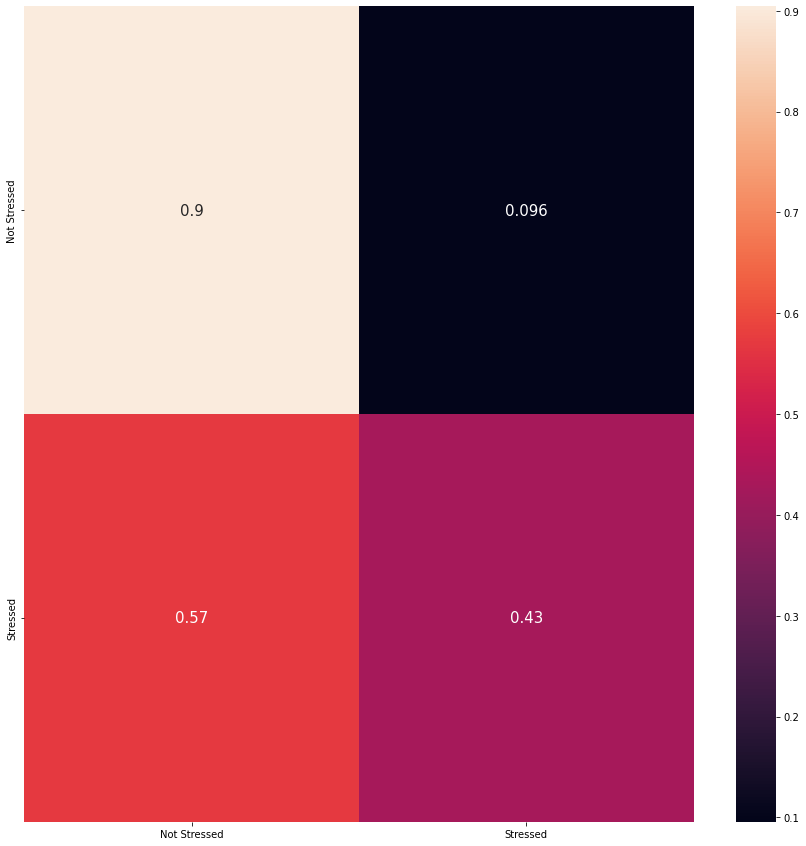

In [108]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stressed','Stressed'],columns = ['Not Stressed','Stressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [109]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40))
model3.add(layers.Bidirectional(layers.LSTM(40,dropout=0.5)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
16/16 [==============================] - 17s 824ms/step - loss: 0.6496 - accuracy: 0.6605 - val_loss: 0.5969 - val_accuracy: 0.7012
Epoch 2/8
16/16 [==============================] - 11s 707ms/step - loss: 0.6076 - accuracy: 0.6871 - val_loss: 0.5826 - val_accuracy: 0.7012
Epoch 3/8
16/16 [==============================] - 11s 723ms/step - loss: 0.5799 - accuracy: 0.6871 - val_loss: 0.7795 - val_accuracy: 0.7012
Epoch 4/8
16/16 [==============================] - 7s 468ms/step - loss: 0.5453 - accuracy: 0.6933 - val_loss: 0.5509 - val_accuracy: 0.7317
Epoch 5/8
16/16 [==============================] - 6s 352ms/step - loss: 0.4661 - accuracy: 0.7403 - val_loss: 0.4751 - val_accuracy: 0.7561
Epoch 6/8
16/16 [==============================] - 6s 355ms/step - loss: 0.3941 - accuracy: 0.8323 - val_loss: 0.4512 - val_accuracy: 0.7622
Epoch 7/8
16/16 [==============================] - 6s 352ms/step - loss: 0.3410 - accuracy: 0.8855 - val_loss: 0.4422 - val_accuracy: 0.7927
Epoch 8/8


In [110]:
y_pred = model3.predict(X_test)

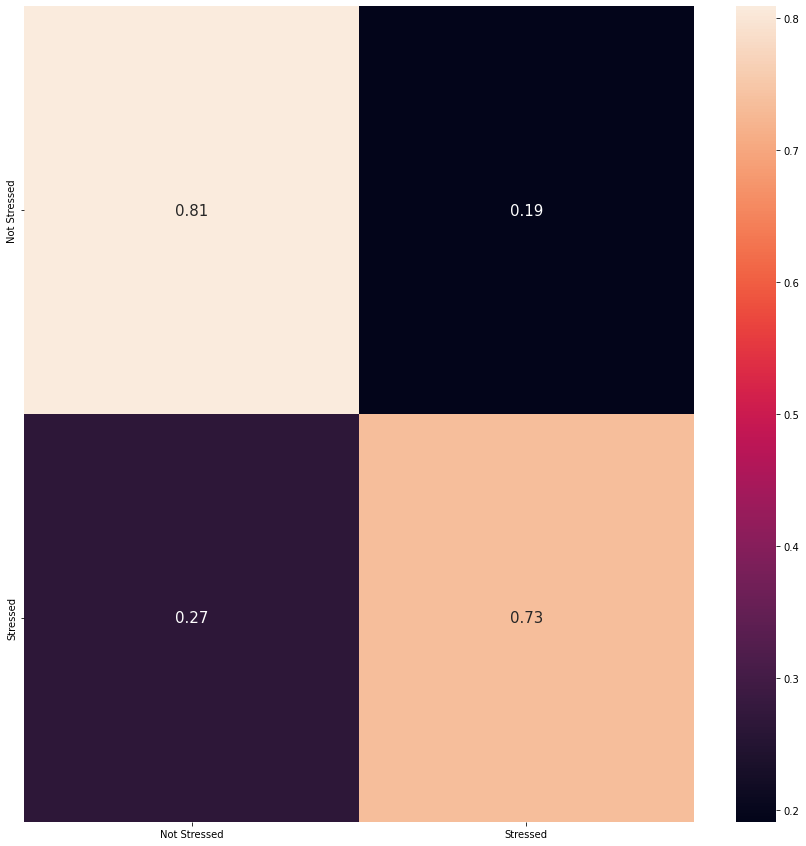

In [111]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stressed','Stressed'],columns = ['Not Stressed','Stressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [112]:
test = np.array(['I feel depressed, sadness and anxiety - just want to sleep until the lockdown ends'])
test_sequence = tokenizer.texts_to_sequences(test)
test_sequence = pad_sequences(test_sequence, maxlen=max_len)
test_prediction = model3.predict(test_sequence)
if np.around(test_prediction, decimals=0)[0][0] == 1.0:
    print('The model predicted stressed language')
else:
    print("The model predicted other type of language")

The model predicted other type of language


In [113]:
os.listdir('/content/drive/MyDrive')[:5]

['Application_letter20082019.pdf',
 'English assignment',
 'English assignment 1',
 'English assignment 2',
 'LearnerLicense.pdf']

In [118]:
tweets = pd.read_csv('/content/0314_1.csv')
tweets.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-03-14 23:55:21,AlbertoxVazquez,NaN,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,NaN,1238977045230739460,https://twitter.com/AlbertoxVazquez/status/123...
1,2020-03-14 23:54:45,TheOGKennedy,NaN,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,NaN,1238976896160772096,https://twitter.com/TheOGKennedy/status/123897...
2,2020-03-14 23:45:58,megmarie5,NaN,0,0,0,@ariana2525 I myself suffered & still suffer. ...,NaN,@ariana2525,NaN,1238974685015990273,https://twitter.com/megmarie5/status/123897468...
3,2020-03-14 23:43:10,BoozyBillsBabe,NaN,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,NaN,1238973978963836928,https://twitter.com/BoozyBillsBabe/status/1238...
4,2020-03-14 23:42:39,megmarie5,NaN,0,0,1,I’m behind on @VanderpumpRules and binge watch...,NaN,@VanderpumpRules @ariana2525,NaN,1238973850227884032,https://twitter.com/megmarie5/status/123897385...


In [120]:
for dirname,_,filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        if filename!='0314_1.csv':
            temp = pd.read_csv(os.path.join(dirname,filename))
            tweets = pd.concat([tweets,temp],ignore_index=True)

In [121]:
tweets.shape

(288, 2810)

In [122]:
tweets.sort_values(by=['date'],inplace=True)
tweets.reset_index(drop=True,inplace=True)
tweets = tweets[['date','text']]

In [123]:
tweets_dataset = tweets.copy()
tweets.head()

,date,text
0,2020-03-14 00:04:13,Damn just remembered this front bottoms show i...
1,2020-03-14 00:07:19,"hapless Dementia joe will lose to Trump, even ..."
2,2020-03-14 00:08:46,I’m so glad my depression kicked in I’m going ...
3,2020-03-14 00:14:19,Can’t wait to tell my kids about the toilet pa...
4,2020-03-14 00:14:34,I think in order to keep sick hourly workers h...


In [124]:
#Removing non-ascii characters (for example, arabian chars)
tweets.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#Making all fields string type
for i in range(len(tweets)):
  tweets.at[i,'text'] = str(tweets.iloc[i]['text'])
#Removing URLs
for i in range(len(tweets)):
  tweets.at[i,'text'] = remove_urls(tweets.iloc[i]['text'])
# Convert to list
data = tweets.text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [125]:
data = np.array(data)
data[:10]

array(['Damn just remembered this front bottoms show is about to cure my depression',
       'hapless Dementia joe will lose to Trump, even if the economy craters into a full on depression & covid19 kills millions of people. Second you cannot expect to conduct an unfair, corrupt & illegitimate primary & expect people to fall in line. I voted for Hillary last time no mas.',
       'Im so glad my depression kicked in Im going to BED',
       'Cant wait to tell my kids about the toilet paper depression of 2020',
       'I think in order to keep sick hourly workers home, and to support people who cant work from home but have kids home from school, we need a much fatter bailout. 1/2 trillion or more. We risk an economic depression. This is serious.',
       'Right on, dedication is proven to our city. "We have sustained this Market through the Depression, world wars and other society seismic shifts." Free delivery and two-hour parking is now free for market shoppers at 11th & Arch. (Safe st

In [126]:
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   27    2    7]
 [   0    0    0 ...  240   81   85]
 [   0    0    0 ...   23   67    2]
 ...
 [   0    0    0 ...  556    6    7]
 [   0    0    0 ...    5 1106   58]
 [   0    0    0 ...   23    8   63]]


In [127]:
predictions = model3.predict(tweets)

In [128]:
np.around(predictions, decimals=0)

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [129]:
tweets_dataset['label'] = np.around(predictions, decimals=0)

In [130]:
tweets_dataset[tweets_dataset['label']==1.0].head(10)

,date,text,label
4,2020-03-14 00:14:34,I think in order to keep sick hourly workers h...,1.0
5,2020-03-14 00:15:00,"Right on, dedication is proven to our city. ""W...",1.0
6,2020-03-14 00:20:51,And here we are the Great Depression of toilet...,1.0
9,2020-03-14 00:24:20,Take me back! Kind of been in a slight depress...,1.0
11,2020-03-14 00:27:29,Take me back! Kind of been in a slight depress...,1.0
13,2020-03-14 00:28:31,"Seasonal depression is a fucking bitch, depres...",1.0
14,2020-03-14 00:29:06,Take me back! Kind of been in a slight depress...,1.0
15,2020-03-14 00:33:07,Take me back! Kind of been in a slight depress...,1.0
18,2020-03-14 00:55:24,@Tyson_Fury As a fellow sufferer of anxiety/pa...,1.0
19,2020-03-14 00:55:56,"I’m a person that sufferers from PTSD, depress...",1.0


In [131]:
for i in range(10):
    print(tweets_dataset.iloc[i*2]['text'])
    print('\n')

Damn just remembered this front bottoms show is about to cure my depression


I’m so glad my depression kicked in I’m going to BED


I think in order to keep sick hourly workers home, and to support people who can’t work from home but have kids home from school, we need a much fatter bailout. 1/2 trillion or more. We risk an economic depression. This is serious.


And here we are the Great Depression of toilet paper


Depression is knocking at the door #Tougaloo_RYS20 #Jackson_RYS20https://twitter.com/UnderRatedTim/status/1238589018662715392 …


People talking recession, I seriously see a depression.....


The Great Depression Mode #BandsFromHistory


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.com/p/B9sadOHnONi/?igshid=ruq1lb76vmyz …


We bouta have the Great Depression all over again


@Tyson_Fury A